In [307]:
%matplotlib inline
import matplotlib
matplotlib.use('nbagg')
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [308]:
import numpy as np
import pandas as pd

In [309]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [310]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker
from sqlalchemy.orm import Session
from sqlalchemy import Index
from sqlalchemy import MetaData
from sqlalchemy import Table
import csv
import pandas as pd

In [311]:
import warnings
warnings.filterwarnings('ignore')

In [312]:
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect
from sqlalchemy import func
from sqlalchemy import Column, Integer, Float, Date, String, ForeignKey


In [313]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [314]:
inspector = inspect(engine)
inspector.get_table_names()
##Tha same as Base.Classes.keys() ??

['measurement', 'station']

In [315]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [316]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [317]:
# Save references to each table
Measurement = Base.classes.measurement


In [318]:
Station = Base.classes.station

In [319]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [320]:
#Flask setup
app = Flask(__name__)

In [321]:
#inspect measurement schema
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [322]:
#inspect station columns
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [323]:
mapper = inspect(Measurement)
print(mapper)

mapped class measurement->measurement


In [324]:
mapper = inspect(Station)
print(mapper)

mapped class station->station


In [325]:
# Create our session (link) from Python to the DB
Session = sessionmaker(bind=engine)
#Session --> Class
session = Session()
#session is an instance of the class session

In [326]:
engine.execute('SELECT * FROM measurement LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [327]:
engine.execute('SELECT * FROM station LIMIT 5').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)]

# Exploratory Climate Analysis

In [328]:
#how dates are formatted
date_format = session.query(Measurement.date).limit(5).all()
for result in date_format:
    print(result)

('2010-01-01',)
('2010-01-02',)
('2010-01-03',)
('2010-01-04',)
('2010-01-06',)


In [329]:
#dates are formatted as YYY-MM-DD thank you github:Eric Hagee for this code

max_date = session.query(func.max(func.strftime("%Y-%m-%d", Measurement.date))).limit(5).all()
max_date[0][0]
max_date

[('2017-08-23')]

In [330]:
#import date formatting tools
import datetime

In [331]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data

In [332]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
last_year_precip = session.query(func.strftime("%Y-%m-%d", Measurement.date), Measurement.prcp).\
    filter(func.strftime("%Y-%m-%d", Measurement.date) >= datetime.date(2016, 8, 23)).all()

last_year_precip


[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [333]:
#convert to dataframe
last_year_precip_df = pd.DataFrame(last_year_precip, columns = ['date', 'precipitation'])

last_year_precip_df.head()

,date,precipitation
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00


In [334]:
#set date as index
last_year_precip_df.set_index('date', inplace = True)
last_year_precip_df.head()

,precipitation
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00


In [335]:
# Calculate the date 1 year ago from the last data point in the database
one_year_before = dt.date(2017, 8, 23) - dt.timedelta(days=365)
one_year_before

datetime.date(2016, 8, 23)

In [336]:
# Sort the dataframe by date
last_year_precip_df.sort_values(by = 'date')
last_year_precip_df.head()

,precipitation
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00


<IPython.core.display.Javascript object>


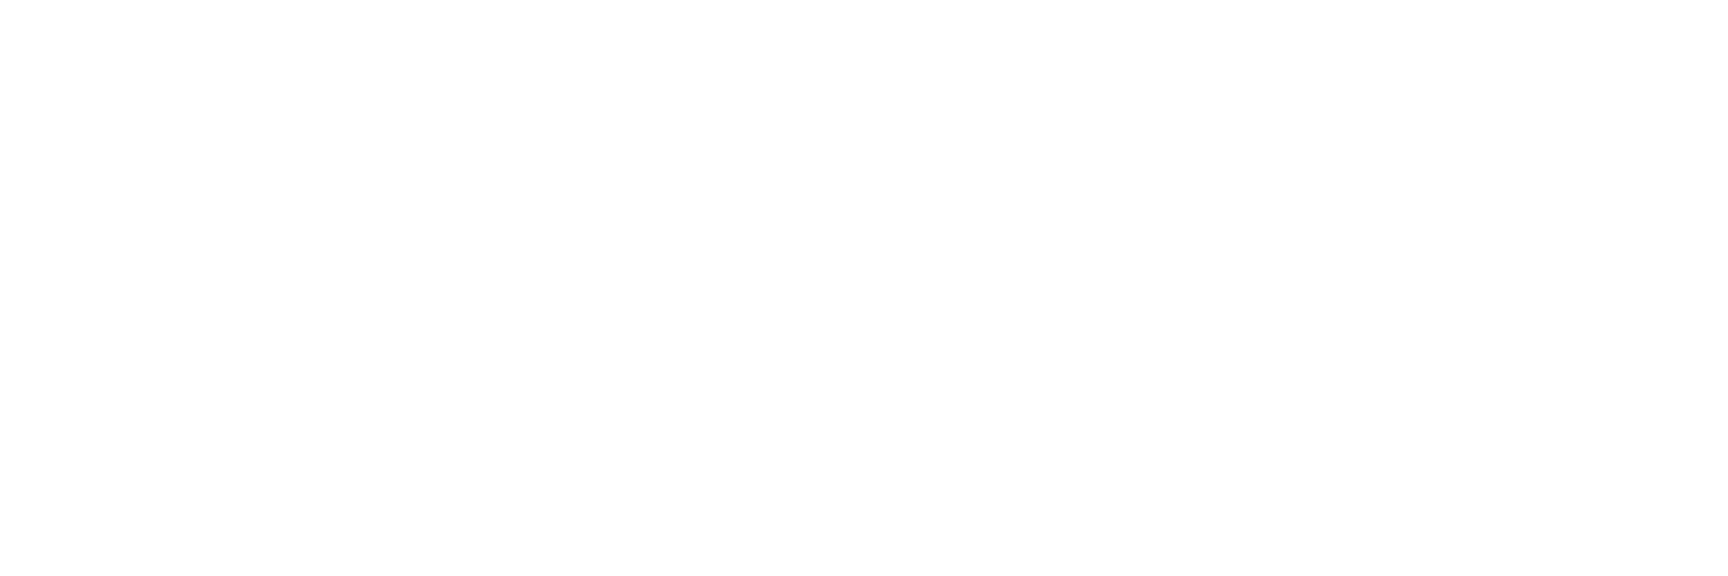

<function matplotlib.pyplot.show(*args, **kw)>

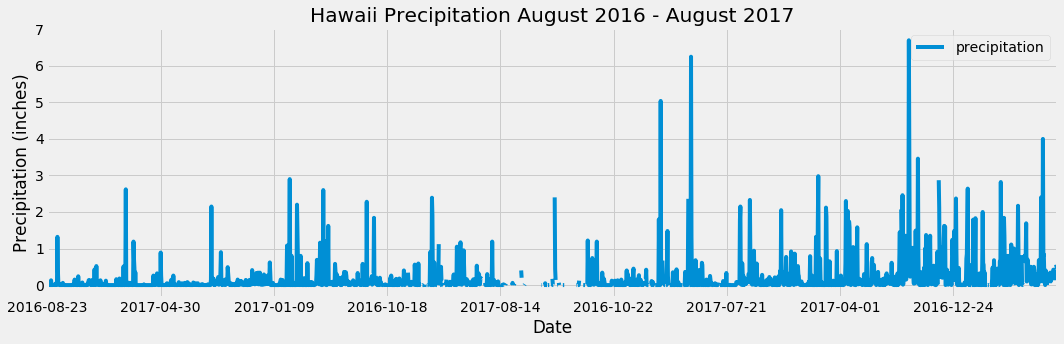

In [337]:
# Use Pandas Plotting with Matplotlib to plot the data

fig, ax = plt.subplots(figsize = (15, 5))
last_year_precip_df.plot(ax = ax, x_compat = True)

#Title
ax.set_title("Hawaii Precipitation August 2016 - August 2017")

#Axis Labels
ax.set_xlabel('Date')
ax.set_ylabel('Precipitation (inches)')

#SAVE FIG
plt.savefig("HawaiiPrecip.png")

#PLOT
plt.tight_layout()
plt.show

In [338]:
# Use Pandas to calcualte the summary statistics for the precipitation data

last_year_precip_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [339]:
# Design a query to show how many stations are available in this dataset?
station_count = session.query(Station.id).distinct().count()
print("Number of Stations: " + str(station_count))


Number of Stations: 9


In [340]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

active_stations = session.query(Station.station, func.count(Measurement.id)).select_from(Measurement).\
    join(Station, Measurement.station == Station.station).group_by(Station.station).\
    order_by(func.count(Measurement.id).desc()).all()

active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [341]:
for result in active_stations:
    print(f"Station: {result[0]},\tCount: {result[1]}")

Station: USC00519281,	Count: 2772
Station: USC00519397,	Count: 2724
Station: USC00513117,	Count: 2709
Station: USC00519523,	Count: 2669
Station: USC00516128,	Count: 2612
Station: USC00514830,	Count: 2202
Station: USC00511918,	Count: 1979
Station: USC00517948,	Count: 1372
Station: USC00518838,	Count: 511


In [342]:
print("Station USC00519281 has the highest number of observations")

Station USC00519281 has the highest number of observations


In [343]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

# most active station:
most_active_station = 'USC00519281'
#Tempurature Summaries
temp_summaries = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == most_active_station).all()

print(f"Lowest Tempurature Recorded: {temp_summaries[0][0]} Fahrenheit")
print(f"Highest Tempurature Recorded: {temp_summaries[0][1]} Fahrenheit")
print(f"Average Tempurature Recorded: {round(temp_summaries[0][2], 2 )} Fahrenheit")

Lowest Tempurature Recorded: 54.0 Fahrenheit
Highest Tempurature Recorded: 85.0 Fahrenheit
Average Tempurature Recorded: 71.66 Fahrenheit


In [344]:
# Choose the station with the highest number of temperature observations.
most_active_station = 'USC00519281'

# Query the last 12 months of temperature observation data for this station
most_active_station_year_temps = session.query(Measurement.date, Measurement.tobs).filter(Measurement.station == most_active_station).\
    filter(func.strftime("%Y-%m-%d", Measurement.date) >=datetime.date(2016, 8, 23)).all()
most_active_station_year_temps


[('2016-08-23', 77.0),
 ('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 78.0),
 ('2016-09-05', 78.0),
 ('2016-09-06', 73.0),
 ('2016-09-07', 74.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 77.0),
 ('2016-09-11', 80.0),
 ('2016-09-12', 76.0),
 ('2016-09-13', 79.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 78.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 78.0),
 ('2016-09-19', 78.0),
 ('2016-09-20', 76.0),
 ('2016-09-21', 74.0),
 ('2016-09-22', 77.0),
 ('2016-09-23', 78.0),
 ('2016-09-24', 79.0),
 ('2016-09-25', 79.0),
 ('2016-09-26', 77.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 78.0),
 ('2016-09-29', 78.0),
 ('2016-09-30', 78.0),
 ('2016-10-01', 77.0),
 ('2016-10-02', 79.0),
 ('2016-10-03', 79.0),
 ('2016-10-04', 79.0),
 ('2016-10-

In [345]:
#Convert most_active_station_year_temps to df
most_active_station_year_temps_df = pd.DataFrame(most_active_station_year_temps, columns = ['date', 'temperature'])
most_active_station_year_temps_df.head()

,date,temperature
0,2016-08-23,77.0
1,2016-08-24,77.0
2,2016-08-25,80.0
3,2016-08-26,80.0
4,2016-08-27,75.0


In [346]:
#Index by date
most_active_station_year_temps_df.set_index('date', inplace = True)
most_active_station_year_temps_df.head()

,temperature
date,
2016-08-23,77.0
2016-08-24,77.0
2016-08-25,80.0
2016-08-26,80.0
2016-08-27,75.0


<IPython.core.display.Javascript object>


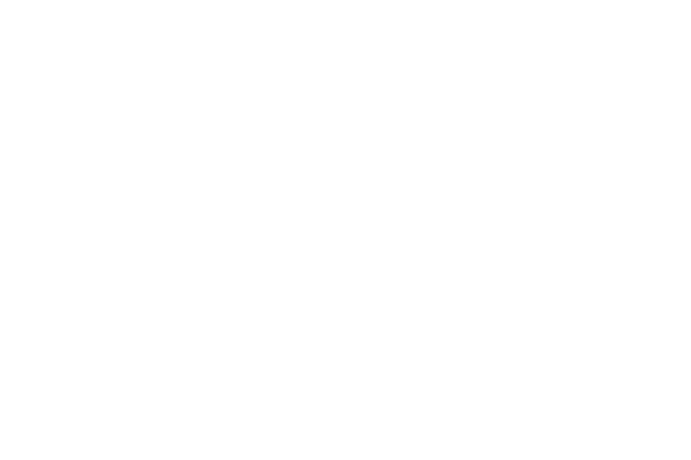

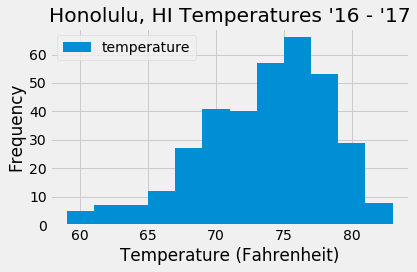

In [347]:
# plot the results as a histogram

fig, ax = plt.subplots()
most_active_station_year_temps_df.plot.hist(bins = 12, ax = ax)

#set title
ax.set_title("Honolulu, HI Temperatures '16 - '17")

#set axis labels
ax.set_xlabel('Temperature (Fahrenheit)')
ax.set_ylabel('Frequency')

plt.savefig("histogram.png")

#plot histogram
plt.tight_layout()
plt.show()

In [348]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()




# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [349]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
### My trip dates are 10-24-2019 -- 11-2-2019 ... i think i have to go back to october 2016 data

mytrip_temps = calc_temps('2016-10-24', '2016-11-01')

print(f"Lowest Tempurature: {mytrip_temps[0][0]} Fahrenheit")
print(f"Average Tempurature: {round(mytrip_temps[0][1], 2)} Fahrenheit")
print(f"Highest Temperature: {mytrip_temps[0][2]} Fahrenheit")



Lowest Tempurature: 68.0 Fahrenheit
Average Tempurature: 75.97 Fahrenheit
Highest Temperature: 81.0 Fahrenheit


<IPython.core.display.Javascript object>


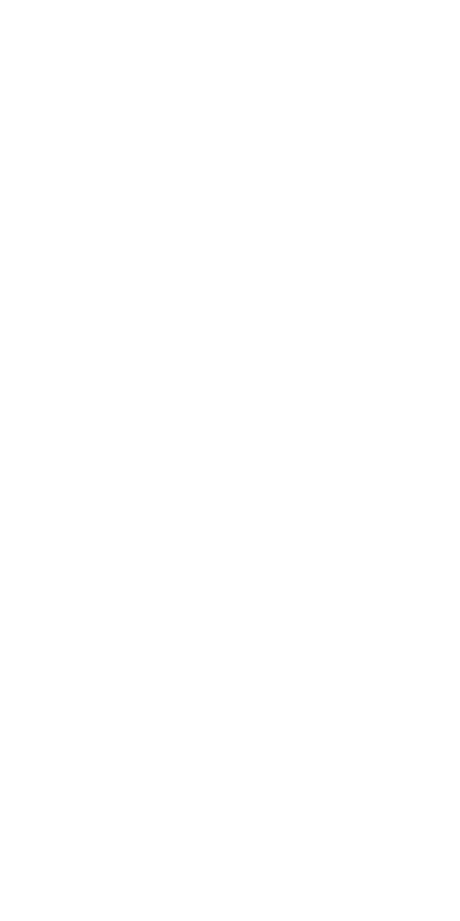

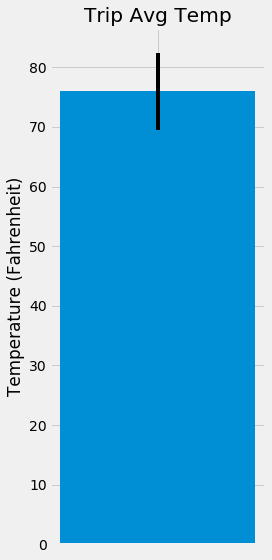

In [350]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

pk_to_pk = mytrip_temps[0][2] - mytrip_temps[0][0]
avg_temp = mytrip_temps[0][1]

#PLOT
fig, ax = plt.subplots(figsize = (4, 8))

ax.bar(1, avg_temp, yerr = pk_to_pk/2, width = 0.6)

#title
ax.set_title('Trip Avg Temp')

#labels
ax.set_xticks([1])
ax.set_xticklabels([""])
ax.set_ylabel('Temperature (Fahrenheit)')

#SAVE
plt.savefig("tempbargraph.png")

plt.tight_layout()
plt.show()

In [351]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

rainfall_count = session.query(Station.station, Station.name, Station.latitude, Station.longitude, Station.elevation, func.avg(Measurement.prcp)).\
    filter(Measurement.station == Station.station).\
    group_by(Measurement.station).filter(Measurement.date.between('2016-10-24', '2016-11-01')).all()
    
rainfall_count 



[('USC00513117',
  'KANEOHE 838.1, HI US',
  21.4234,
  -157.8015,
  14.6,
  0.043333333333333335),
 ('USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  21.5213,
  -157.8374,
  7.0,
  0.085),
 ('USC00516128',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4,
  0.5955555555555555),
 ('USC00517948',
  'PEARL CITY, HI US',
  21.3934,
  -157.9751,
  11.9,
  0.30000000000000004),
 ('USC00519281',
  'WAIHEE 837.5, HI US',
  21.45167,
  -157.84888999999998,
  32.9,
  0.1),
 ('USC00519397',
  'WAIKIKI 717.2, HI US',
  21.2716,
  -157.8168,
  3.0,
  0.03333333333333334),
 ('USC00519523',
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  21.33556,
  -157.71139,
  19.5,
  0.04777777777777778)]

In [352]:
rainfall_count_df = pd.DataFrame(rainfall_count, columns = ['Station', 'Name', 'Latitude', 'Longitude', 'Elevation', 'Avg. Precipitation (in.)'])

rainfall_count_df


,Station,Name,Latitude,Longitude,Elevation,Avg. Precipitation (in.)
0,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6,0.043333
1,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0,0.085000
2,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4,0.595556
3,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9,0.300000
4,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9,0.100000
5,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0,0.033333
6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5,0.047778


In [353]:
#set station as index
rainfall_count_df.set_index('Station', inplace = True)
rainfall_count_df.head()

,Name,Latitude,Longitude,Elevation,Avg. Precipitation (in.)
Station,,,,,
USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6,0.043333
USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0,0.085000
USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4,0.595556
USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9,0.300000
USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9,0.100000


In [354]:
# Sort the dataframe by Avg. Precipitation (in.)
rainfall_count_df.sort_values(by = 'Avg. Precipitation (in.)')
rainfall_count_df.head()

,Name,Latitude,Longitude,Elevation,Avg. Precipitation (in.)
Station,,,,,
USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6,0.043333
USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0,0.085000
USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4,0.595556
USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9,0.300000
USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9,0.100000


In [363]:
## Thank you ambientstl && 
## Thank you ejhagee on github for some help with code references